# Project 2: Wake Effect Simulation in a 3×3 Wind Farm


## Executive Summary

This project models wake effects in a 3×3 wind farm using the Jensen (Park) wake model.
The wind is assumed to blow from left to right (west to east), and we quantify how
upstream turbines reduce the wind speed and power output of downstream turbines.
We compute effective wind speeds at each turbine, estimate power losses, and visualize
the farm layout and power distribution.


In [ ]:
import os
import sys
import json
import matplotlib.pyplot as plt

# Correct path to the project root
project_root = os.path.abspath(os.path.join(".."))
if project_root not in sys.path:
    sys.path.append(project_root)

# Now import using the package name
from src.turbine import Turbine
from src.farm import WindFarm
from src.utils import plot_farm_layout, plot_power_bar

In [3]:
data_path = os.path.join("..", "data", "turbine_specs.json")
with open(data_path, "r") as f:
    specs = json.load(f)

specs


{'rotor_diameter': 120,
 'hub_height': 90,
 'thrust_coefficient': 0.8,
 'rated_power_kw': 3000}

In [4]:
D = specs["rotor_diameter"]
C_T = specs["thrust_coefficient"]
P_rated = specs["rated_power_kw"]

# Spacing: 5D in x and y
spacing = 5 * D  # 600 m

turbines = []
for i in range(3):      # rows in x (0, 1, 2)
    for j in range(3):  # columns in y (0, 1, 2)
        x = i * spacing
        y = j * spacing
        turbines.append(Turbine(x, y, D, C_T, P_rated))

len(turbines), [(t.x, t.y) for t in turbines]


(9,
 [(0, 0),
  (0, 600),
  (0, 1200),
  (600, 0),
  (600, 600),
  (600, 1200),
  (1200, 0),
  (1200, 600),
  (1200, 1200)])

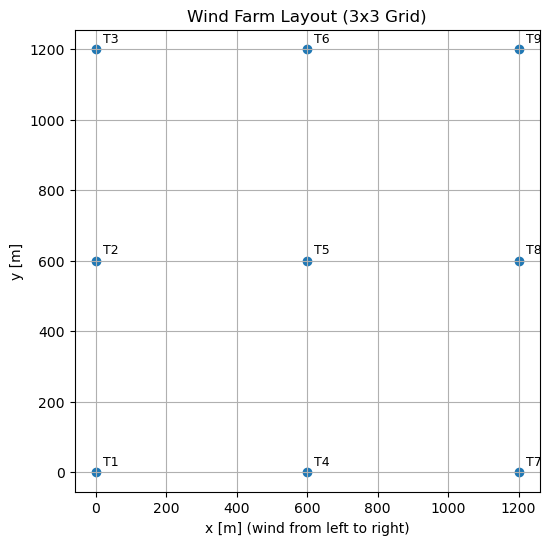

In [5]:
results_dir = os.path.join("..", "results")
os.makedirs(results_dir, exist_ok=True)

layout_path = os.path.join(results_dir, "farm_layout.png")
plot_farm_layout(turbines, filename=layout_path)


In [6]:
U_inf = 8.0  # m/s, free-stream wind speed
k = 0.04     # wake expansion coefficient (onshore typical)

farm = WindFarm(turbines, U_inf=U_inf, k=k)

powers = [farm.power_at(i) for i in range(len(turbines))]
farm_total_power = farm.farm_power()

powers, farm_total_power


([888.8888888888887,
  888.8888888888887,
  888.8888888888887,
  328.9722994219946,
  328.9722994219946,
  328.9722994219946,
  267.7953226933272,
  267.7953226933272,
  267.7953226933272],
 4456.9695330126315)

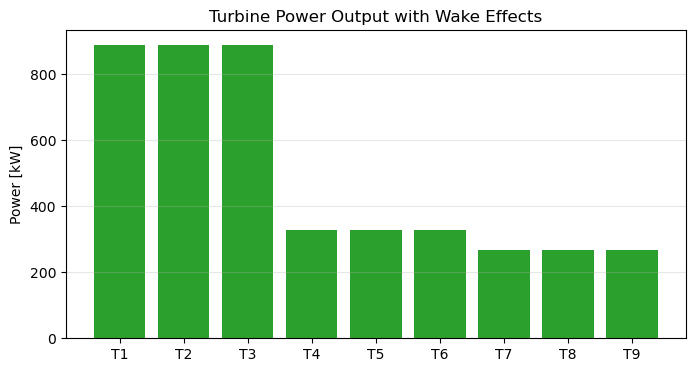

In [7]:
power_plot_path = os.path.join(results_dir, "power_distribution.png")
plot_power_bar(turbines, powers, filename=power_plot_path)


## Results

- The free-stream wind speed was set to 8 m/s.
- The turbines are arranged in a 3×3 grid with 5D spacing in both x and y.
- The wind direction is from left to right, so the leftmost column is fully exposed,
  while the middle and right columns experience wake deficits.
- The power plot shows a clear reduction in power output for downstream turbines,
  especially those directly behind upstream machines.


## Conclusion

This project demonstrates how wake effects in a wind farm can be modeled using the
Jensen (Park) wake model. Even with relatively simple assumptions, the model captures
the key qualitative behavior: downstream turbines experience reduced wind speeds and
lower power output due to the wakes of upstream turbines.

This 3×3 layout provides a foundation for more advanced studies, such as:
- Optimizing turbine spacing and layout
- Including wind direction variability
- Modeling turbulence intensity and fatigue loads
- Comparing different wake models or validating against CFD or field data
